# `Heart Disease-Prediction with Ensemble Models`

 **`Name:`** Mudassir Aqeel
 **`Seat#`** EP-1897015

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [7]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [268]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [269]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\muzzamil\anaconda\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.offline
import warnings
warnings.filterwarnings('ignore')

In [1]:
df = pd.read_csv('heart.csv')
df.head(10).style.background_gradient(cmap='Greens')

NameError: name 'pd' is not defined

## 1 - Data Understanding

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


#### About the Dataset

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]

### **What the problem is**

○ In the given study, we have a binary classification problem.

○ We will make a prection on the target variable HeartDisease

○ Lastly we will build a variety of Classification models and compare the models giving the best prediction on Heart Disease.

### **Target Variable**

Target variable, in the machine learning context, is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our study our target variable is HeartDisease in the contex of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

In [5]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,918,53.5109,9.43262,28,47,54,60,77
RestingBP,918,132.397,18.5142,0,120,130,140,200
Cholesterol,918,198.8,109.384,0,173.25,223,267,603
FastingBS,918,0.233115,0.423046,0,0,0,0,1
MaxHR,918,136.809,25.4603,60,120,138,156,202
Oldpeak,918,0.887364,1.06657,-2.6,0,0.6,1.5,6.2
HeartDisease,918,0.553377,0.497414,0,0,1,1,1


In [6]:
df.describe(include = object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64


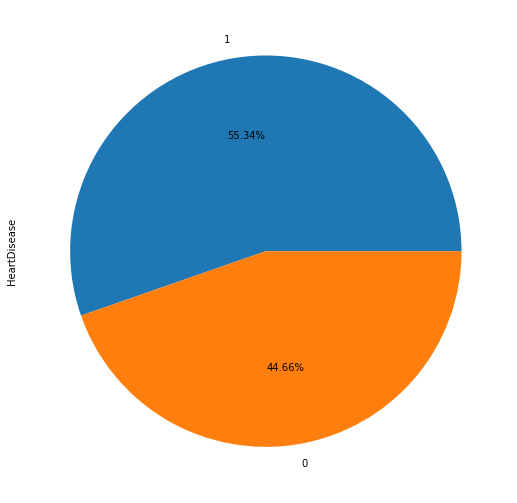

In [26]:
print(df["HeartDisease"].value_counts())
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.2f%%', figsize=(10,9));

In [28]:
categorical_feature = df.dtypes == object
#---------------------------#
final_categorical_feature = df.columns[categorical_feature].tolist()
final_numeric_feature = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

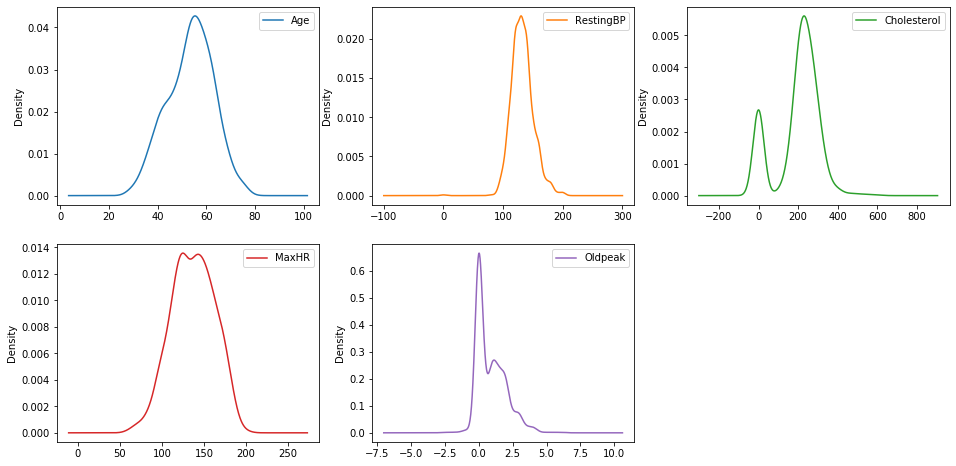

In [31]:
df[final_numeric_feature].plot(kind = 'density',subplots = True,
                               layout = (2,3), sharex = False, figsize = (16,8))
plt.show()

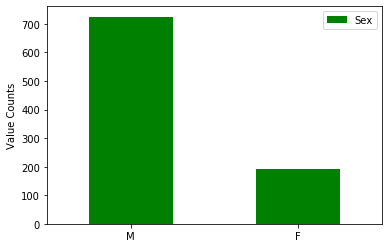

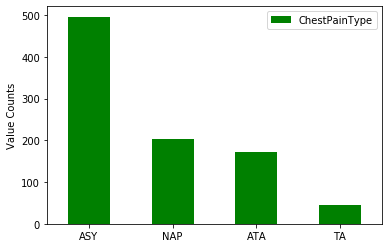

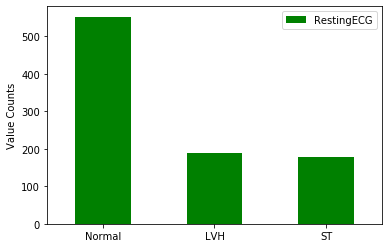

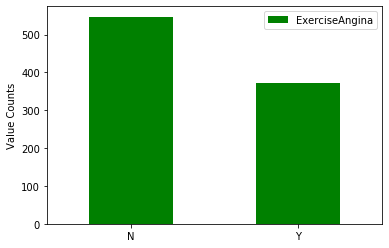

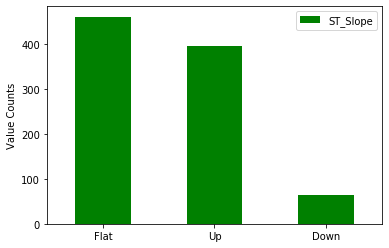

In [11]:
for i in range(len(final_categorical_feature)):
    df[final_categorical_feature[i]].value_counts().plot(kind='bar',legend = True,color = 'green')
    plt.ylabel('Value Counts')
    plt.xticks(rotation = 'horizontal')
    plt.show()

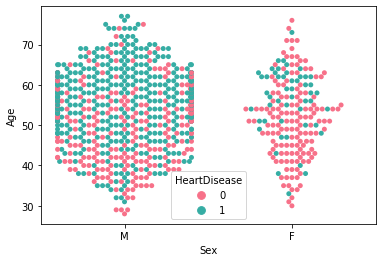

In [12]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df, palette="husl");

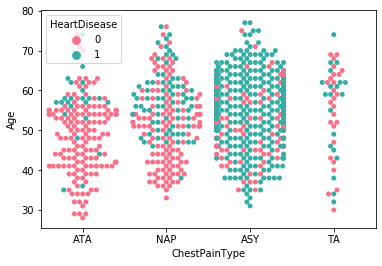

In [13]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=df, palette="husl");

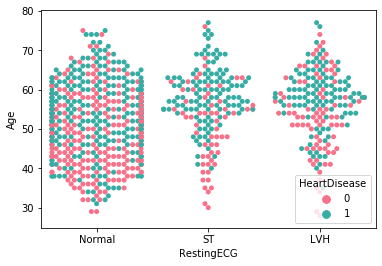

In [14]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=df, palette="husl");

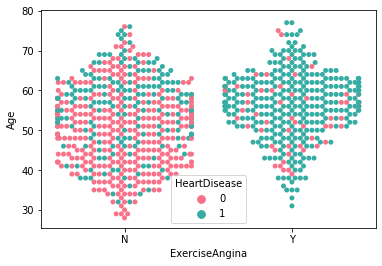

In [15]:
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=df, palette="husl");

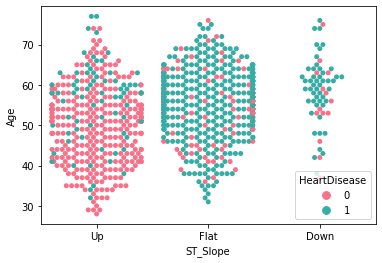

In [16]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=df, palette="husl");

## 2 - Preprocessing

**Pre-defining some functions**

In [17]:
def outlier_detect(df,col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) | (df[col] > (q3_col + 1.5 * iqr_col)))]
#--------------------------------------------------------------------------------------------------
def outlier_detect_normal(df, col):
    m = df[col].mean()
    s = df[col].std()
    return df[((df[col]-m)/s).abs()>3]
#--------------------------------------------------------------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col]<(q1_col - 1.5 * iqr_col))]
    return lower
#--------------------------------------------------------------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col]>(q3_col + 1.5 * iqr_col))]
    return lower
#--------------------------------------------------------------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)),tmp)
    df[col] = df[col].replace(tmp, upper)
    print('Outlier with upper bound - {}'.format(col))
#--------------------------------------------------------------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where (lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('Outlier replace with lower bound - {}'.format(col))
#--------------------------------------------------------------------------------------------------
def preprocess(df, col):
    print("************************************************ {} ************************************************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0],
                                                                upper_outlier(df,col).shape[0]))
    plt.figure(figsize =(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind = 'box', subplots = True, sharex = False, vert = False)
    plt.subplot(2,1,2)
    df[col].plot(kind = 'density',subplots = True, sharex = False)
    plt.show()

so after pre-defining methods we have to manage the outliers 

In [1]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

NameError: name 'df' is not defined

In [19]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],
                                 (outlier_detect(df[final_numeric_feature],
                                 final_numeric_feature[i]).shape[0])))
    print('Z_score => {}: {}'.format(final_numeric_feature[i],
                                     (outlier_detect_normal(df[final_numeric_feature],
                                     final_numeric_feature[i]).shape[0])))
    print('************************************')

IQR => Age: 0
Z_score => Age: 0
************************************
IQR => RestingBP: 28
Z_score => RestingBP: 8
************************************
IQR => Cholesterol: 183
Z_score => Cholesterol: 3
************************************
IQR => MaxHR: 2
Z_score => MaxHR: 1
************************************
IQR => Oldpeak: 16
Z_score => Oldpeak: 7
************************************


************************************************ Age ************************************************

lower outlier: 0 ****** upper outlier: 0



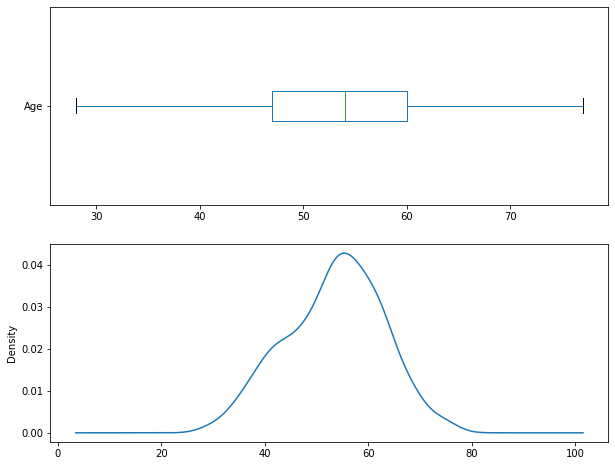

************************************************ RestingBP ************************************************

lower outlier: 2 ****** upper outlier: 26



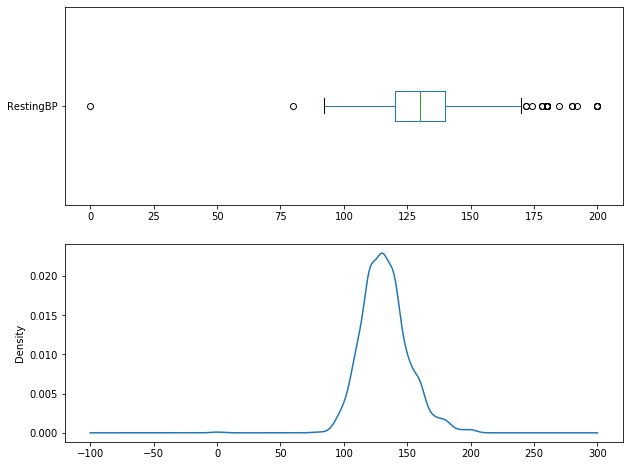

************************************************ Cholesterol ************************************************

lower outlier: 172 ****** upper outlier: 11



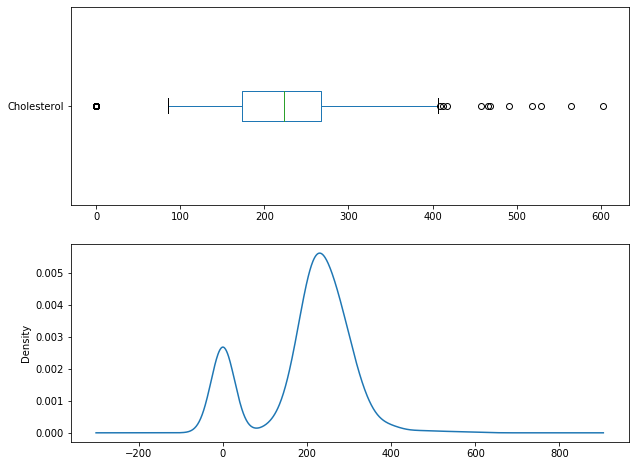

************************************************ MaxHR ************************************************

lower outlier: 2 ****** upper outlier: 0



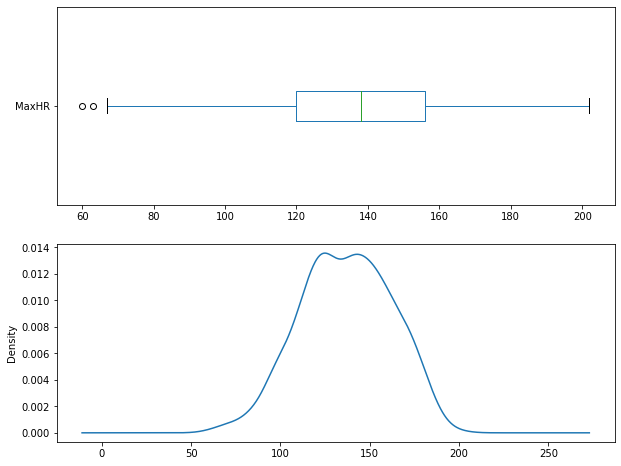

************************************************ Oldpeak ************************************************

lower outlier: 1 ****** upper outlier: 15



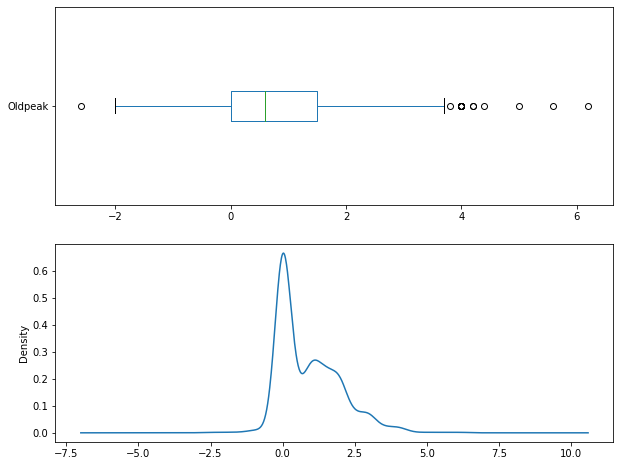

In [20]:
for i in range(len(final_numeric_feature)):
    preprocess(df[final_numeric_feature], final_numeric_feature[i])

In [21]:
outlier = []
for i in range(len(final_numeric_feature)):
    if outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0] != 0:
        outlier.append(final_numeric_feature[i])
        
outlier

['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [22]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i])
print("\n***************************************************************\n")
for i in range(len(outlier)):
    replace_lower(df,outlier[i])

Outlier with upper bound - RestingBP
Outlier with upper bound - Cholesterol
Outlier with upper bound - MaxHR
Outlier with upper bound - Oldpeak

***************************************************************

Outlier replace with lower bound - RestingBP
Outlier replace with lower bound - Cholesterol
Outlier replace with lower bound - MaxHR
Outlier replace with lower bound - Oldpeak


In [23]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],
                                 (outlier_detect(df,final_numeric_feature[i]).shape[0])))
    print("Z_Score => {}: {}".format(final_numeric_feature[i],
                                     (outlier_detect_normal(df,final_numeric_feature[i]).shape[0])))
    print("********************************")

IQR => Age: 0
Z_Score => Age: 0
********************************
IQR => RestingBP: 0
Z_Score => RestingBP: 0
********************************
IQR => Cholesterol: 0
Z_Score => Cholesterol: 0
********************************
IQR => MaxHR: 0
Z_Score => MaxHR: 0
********************************
IQR => Oldpeak: 0
Z_Score => Oldpeak: 1
********************************


**Manage Missing:** we don't have any missing values

In [24]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Convert qualitative data into quantitative

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[final_categorical_feature] = df[final_categorical_feature].apply(lambda col: le.fit_transform(col))
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [26]:
#### Checking duplicate values

In [27]:
df.loc[df.duplicated()].shape

(0, 12)

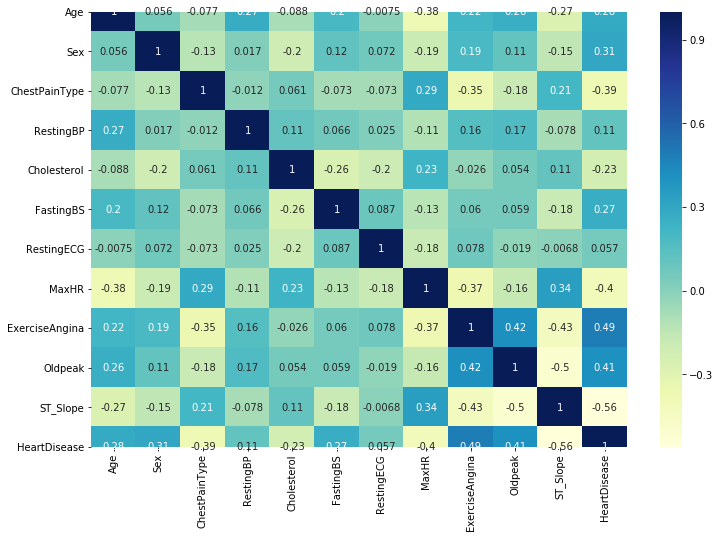

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu",)
plt.xticks(rotation='vertical');

## 3 - Train and Test Split Normalization

In [29]:
x = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100,
                                                 stratify = y, test_size = 0.3)
print(y_train.value_counts())
#random_state gives us the same layout always
#test_size or train_size gives us the proportion to divide the dataset
#stratify will maintain the same proportion  after the split if in boolean categorical order

1    355
0    287
Name: HeartDisease, dtype: int64


Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
col = ['Age','ChestPainType','RestingBP','Cholesterol','RestingECG','MaxHR','Oldpeak','ST_Slope']
x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

# Minmaxscaler sets a range from the extremes of datasets fits it 0 , 1 and then scales data according
# to the distance from extremes b/w 0 and 1

#The fit method is calculating the mean and variance of each of the features present in our data.
#The transform method is transforming all the features using the respective mean and variance.
#Now, we want scaling to be applied to our test data too and at the same time
#do not want to be biased with our model.We want our test data to be a completely new
#and a surprise set for our model. The transform method helps us in this case.

## 4 - Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model

Top reasons to use feature selection are:

○ It enables the machine learning algorithm to train faster.

○ It reduces the complexity of a model and makes it easier to interpret.

○ It improves the accuracy of a model if the right subset is chosen.

**SequentialFeatureSelector :** This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X), not the desired outputs (y).

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier
sfs = SFS(GradientBoostingClassifier(n_estimators = 100, random_state=0),
          k_features = 7,
          forward  = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1).fit(x_train,y_train)

#estimator : scikit-learn classifier or regressor
#forward : bool (default: True) Forward selection if True, backward selection otherwise
#k_features : Number of features to select, where k_features < the full feature set.
#verbose : level of verbosity to use in logging.
#      If 0, no output,
#      if 1 number of features in current set, if 2 detailed logging 
#      including timestamp and cv scores at step.
#scoring: A single str  or a callable to evaluate the predictions on the test set.
# Cross-validation is a resampling method that uses different portions
#of the data to test and train a model on different iterations.
#cv : int (default: 5) Integer or iterable yielding train, test splits. If cv is an integer 
#and `estimator` is a classifier (or y consists of integer class
#labels) stratified k-fold. Otherwise regular k-fold cross-validation
#is performed. No cross-validation if cv is None, False, or 0.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.8s finished

[2021-12-30 14:35:20] Features: 1/7 -- score: 0.8130628881987577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished

[2021-12-30 14:35:22] Features: 2/7 -- score: 0.8364615683229814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.7s finished

[2021-12-30 14:35:24] Features: 3/7 -- score: 0.8457880434782609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.7s finished

[2021-12-30 14:35:26] Features: 4/7 -- score: 0.861354

In [34]:
print('Best Features:\n',sfs.k_feature_names_,end ='\n\n')
print('Best Score:',sfs.k_score_)

Best Features:
 ('Sex', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')

Best Score: 0.8738451086956522


In [35]:
x_train_new = x_train[['Sex','Cholesterol',
                       'FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]
x_test_new = x_test[['Sex','Cholesterol',
                     'FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]

## 5 - Modelling with different classifiers

In [36]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score, precision_score, classification_report

from sklearn.tree import DecisionTreeClassifier

### `Decision Tree Classifier`

In [37]:
DT = DecisionTreeClassifier(max_depth = 5,min_samples_leaf = 5,random_state = 0)
DT.fit(x_train_new,y_train)

y_test_pred_DT = DT.predict(x_test_new)
y_train_pred_DT = DT.predict(x_train_new)

test_acc_DT = accuracy_score(y_test,y_test_pred_DT)
train_acc_DT = accuracy_score(y_train,y_train_pred_DT)
score_DT = cross_val_score(DT, x_train_new, y_train, cv = 10, scoring = 'accuracy')
cv = score_DT.mean()
precision_score_DT = precision_score(y_test,y_test_pred_DT)
recall_score_DT = recall_score(y_test,y_test_pred_DT)
f1_score_DT = f1_score(y_test,y_test_pred_DT)
conf_DT = confusion_matrix(y_test,y_test_pred_DT)

print('Train set Accuracy: ',train_acc_DT)
print('Test set Accuracy: ',test_acc_DT)
print('cv: %f\n'% score_DT.mean())
print("************************************************")
print("Precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_DT))

Train set Accuracy:  0.8956386292834891
Test set Accuracy:  0.8297101449275363
cv: 0.873846

************************************************
Precision_score:  0.8581081081081081
recall_score:  0.8300653594771242
f1_score:  0.8438538205980067
************************************************

Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       123
           1       0.86      0.83      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276




### `Random Forest Classifier`

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=25,
                       random_state=0)

RF.fit(x_train_new, y_train)

y_test_pred_RF = RF.predict(x_test_new)
y_train_pred_RF = RF.predict(x_train_new)

test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
train_acc_RF = accuracy_score(y_train, y_train_pred_RF)
scores_RF= cross_val_score(RF, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_RF = precision_score(y_test, y_test_pred_RF)
recall_score_RF = recall_score(y_test, y_test_pred_RF)
f1_score_RF = f1_score(y_test, y_test_pred_RF)
conf_RF = confusion_matrix(y_test, y_test_pred_RF)


print("Train set Accuracy: ", train_acc_RF)
print("Test set Accuracy: ", test_acc_RF)
print("cv: %s\n"% scores_RF.mean())
print("************************************************")
print("precision_score: ", precision_score_RF)
print("recall_score: ", recall_score_RF)
print("f1_score: ", f1_score_RF)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_RF))


Train set Accuracy:  0.926791277258567
Test set Accuracy:  0.8586956521739131
cv: 0.8645673076923078

************************************************
precision_score:  0.875
recall_score:  0.869281045751634
f1_score:  0.8721311475409835
************************************************

Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       123
           1       0.88      0.87      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276




Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization

### `Extra Trees Classifier`

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
ET = ExtraTreesClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                     n_estimators=200, random_state=0)
ET.fit(x_train_new, y_train)

y_test_pred_ET = ET.predict(x_test_new)
y_train_pred_ET = ET.predict(x_train_new)

test_acc_ET = accuracy_score(y_test, y_test_pred_ET)
train_acc_ET = accuracy_score(y_train, y_train_pred_ET)
scores_ET = cross_val_score(ET, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_ET = precision_score(y_test, y_test_pred_ET)
recall_score_ET = recall_score(y_test, y_test_pred_ET)
f1_score_ET = f1_score(y_test, y_test_pred_ET)
conf_ET = confusion_matrix(y_test, y_test_pred_ET)


print("Tain set Accuracy: ", train_acc_ET)
print("Test set Accuracy: ", test_acc_ET)
print("cv:  %s\n"% scores_ET.mean())
print("************************************************")
print("precision_score: ", precision_score_ET)
print("recall_score: ", recall_score_ET)
print("f1_score: ", f1_score_ET)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_ET))

Tain set Accuracy:  0.8722741433021807
Test set Accuracy:  0.8405797101449275
cv:  0.8707932692307694

************************************************
precision_score:  0.8385093167701864
recall_score:  0.8823529411764706
f1_score:  0.8598726114649682
************************************************

Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       123
           1       0.84      0.88      0.86       153

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276




### `Gradient Boosting Classifier`

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
GB = GradientBoostingClassifier(criterion='mse', loss='exponential',
                           min_samples_leaf=4, min_samples_split=6,
                           n_estimators=25, random_state=0)
GB.fit(x_train_new, y_train)

y_test_pred_GB = GB.predict(x_test_new)
y_train_pred_GB = GB.predict(x_train_new)

test_acc_GB = accuracy_score(y_test, y_test_pred_GB)
train_acc_GB = accuracy_score(y_train, y_train_pred_GB)
scores_GB = cross_val_score(GB, x_train_new , y_train , cv = 10, scoring = 'accuracy' )


precision_score_GB = precision_score(y_test, y_test_pred_GB)
recall_score_GB = recall_score(y_test, y_test_pred_GB)
f1_score_GB = f1_score(y_test, y_test_pred_GB)
conf_GB = confusion_matrix(y_test, y_test_pred_GB)

print("Tain set Accuracy: ", train_acc_GB)
print("Test set Accuracy: ", test_acc_GB)
print("cv:  %s\n"% scores_GB.mean())
print("************************************************")
print("precision_score: ", precision_score_GB)
print("recall_score: ", recall_score_GB)
print("f1_score: ", f1_score_GB)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_GB))

Tain set Accuracy:  0.897196261682243
Test set Accuracy:  0.8333333333333334
cv:  0.8738701923076924

************************************************
precision_score:  0.8451612903225807
recall_score:  0.8562091503267973
f1_score:  0.8506493506493505
************************************************

Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       123
           1       0.85      0.86      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276




### `Support Vector Classifier`

In [44]:
from sklearn.svm import SVC

In [45]:
SVM = SVC(C=10, gamma=0.5, kernel='poly', random_state=0, probability=True)
SVM.fit(x_train_new, y_train)

y_test_pred_SVM = SVM.predict(x_test_new)
y_train_pred_SVM = SVM.predict(x_train_new)

test_acc_SVM = accuracy_score(y_test, y_test_pred_SVM)
train_acc_SVM = accuracy_score(y_train, y_train_pred_SVM)
scores_SVM = cross_val_score(SVM, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_SVM = precision_score(y_test, y_test_pred_SVM, average='macro')
recall_score_SVM = recall_score(y_test, y_test_pred_SVM, average='macro')
f1_score_SVM = f1_score(y_test, y_test_pred_SVM, average='macro')
conf_SVM = confusion_matrix(y_test, y_test_pred_SVM)


print("Tain set Accuracy: ", train_acc_SVM)
print("Test set Accuracy: ", test_acc_SVM)
print("cv:  %s\n"% scores_SVM.mean())
print("************************************************")
print("precision_score: ", precision_score_SVM)
print("recall_score: ", recall_score_SVM)
print("f1_score: ", f1_score_SVM)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_SVM))

Tain set Accuracy:  0.8925233644859814
Test set Accuracy:  0.8478260869565217
cv:  0.8676682692307693

************************************************
precision_score:  0.8457748344370861
recall_score:  0.8468037621552686
f1_score:  0.8462436332767402
************************************************

Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       123
           1       0.87      0.86      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276




### `Logistic Regression`

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')
LR.fit(x_train_new, y_train)

y_test_pred_LR = LR.predict(x_test_new)
y_train_pred_LR = LR.predict(x_train_new)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)
conf_LR = confusion_matrix(y_test, y_test_pred_LR)


print("Tain set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print("cv:  %s\n"% scores_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_LR)
print("recall_score: ", recall_score_LR)
print("f1_score: ", f1_score_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_LR))

Tain set Accuracy:  0.8504672897196262
Test set Accuracy:  0.8115942028985508
cv:  0.8520432692307693

************************************************
precision_score:  0.8435374149659864
recall_score:  0.8104575163398693
f1_score:  0.8266666666666667
************************************************

Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       123
           1       0.84      0.81      0.83       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276




### `KNeighbors Classifier`

In [48]:
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

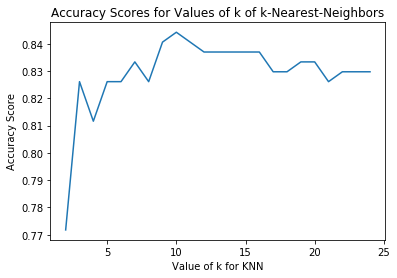

In [49]:
k_range = list(range(2,25))
scores = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train_new, y_train)
    y_pred = KNN.predict(x_test_new)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)


plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')

plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')

In [50]:
d = {'best features number': range(2,25), 'train_score': scores}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.8442028985507246
max accuracy id: 8


In [51]:
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train_new, y_train)

y_test_pred_KNN = KNN.predict(x_test_new)
y_train_pred_KNN = KNN.predict(x_train_new)

test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
scores_KNN = cross_val_score(KNN, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)

print("Tain set Accuracy: ", train_acc_KNN)
print("Test set Accuracy: ", test_acc_KNN)
print("cv:  %s\n"% scores_KNN.mean())
print("************************************************")
print("precision_score: ", precision_score_KNN)
print("recall_score: ", recall_score_KNN)
print("f1_score: ", f1_score_KNN)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_KNN))

Tain set Accuracy:  0.8753894080996885
Test set Accuracy:  0.8260869565217391
cv:  0.8521153846153846

************************************************
precision_score:  0.8523489932885906
recall_score:  0.8300653594771242
f1_score:  0.8410596026490067
************************************************

Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.85      0.83      0.84       153

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83      0.83      0.83       276




### `MLPClassifier`

In [63]:
from sklearn.neural_network import MLPClassifier

In [64]:
MLP = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.1, random_state=0,
              solver='sgd')
MLP.fit(x_train_new, y_train)

y_test_pred_MLP = MLP.predict(x_test_new)
y_train_pred_MLP = MLP.predict(x_train_new)

test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)
train_acc_MLP = accuracy_score(y_train, y_train_pred_MLP)
scores_MLP = cross_val_score(MLP, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_MLP = precision_score(y_test, y_test_pred_MLP)
recall_score_MLP = recall_score(y_test, y_test_pred_MLP)
f1_score_MLP = f1_score(y_test, y_test_pred_MLP)
conf_MLP = confusion_matrix(y_test, y_test_pred_MLP)


print("Tain set Accuracy: ", train_acc_MLP)
print("Test set Accuracy: ", test_acc_MLP)
print("cv:  %s\n"% scores_MLP.mean())
print("************************************************")
print("precision_score: ", precision_score_MLP)
print("recall_score: ", recall_score_MLP)
print("f1_score: ", f1_score_MLP)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_MLP))

Tain set Accuracy:  0.8847352024922118
Test set Accuracy:  0.8478260869565217
cv:  0.8645432692307693

************************************************
precision_score:  0.8580645161290322
recall_score:  0.869281045751634
f1_score:  0.8636363636363638
************************************************

Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       123
           1       0.86      0.87      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276




### `Stacking Classifier`

Stacking is a technique that takes several regression or classification models and uses their output as the input for the meta-classifier/regressor. In its essence, stacking is an ensemble learning technique much like Random Forests where the quality of prediction is improved by combining, typically, weak models.

In [54]:
from sklearn.ensemble import StackingClassifier

In [65]:
estimators = [('DT', DT),
              ('RF', RF),
              ('SVM', SVM),
              ('MLP', MLP),
              ('ET', ET),
              ('LR', LR),
              ('KNN', KNN),
              ('GB', GB),
             ]
SC_tune_LR = StackingClassifier(estimators = estimators, final_estimator = LR)
SC_tune_LR.fit(x_train_new, y_train)

y_test_pred_SC_tune_LR = SC_tune_LR.predict(x_test_new)
y_train_pred_SC_tune_LR = SC_tune_LR.predict(x_train_new)

test_acc_SC_tune_LR = accuracy_score(y_test, y_test_pred_SC_tune_LR)
train_acc_SC_tune_LR = accuracy_score(y_train, y_train_pred_SC_tune_LR)
scores_SC_tune_LR = cross_val_score(SC_tune_LR, x_train_new , y_train , cv = 10, scoring = 'accuracy' )


precision_score_SC_tune_LR = precision_score(y_test, y_test_pred_SC_tune_LR)
recall_score_SC_tune_LR = recall_score(y_test, y_test_pred_SC_tune_LR)
f1_score_SC_tune_LR = f1_score(y_test, y_test_pred_SC_tune_LR)
conf_SC_tune_LR = confusion_matrix(y_test, y_test_pred_SC_tune_LR)

print("Tain set Accuracy: ", train_acc_SC_tune_LR)
print("Test set Accuracy: ", test_acc_SC_tune_LR)
print("cv:  %s\n"% scores_SC_tune_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_SC_tune_LR)
print("recall_score: ", recall_score_SC_tune_LR)
print("f1_score: ", f1_score_SC_tune_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_SC_tune_LR))

Tain set Accuracy:  0.897196261682243
Test set Accuracy:  0.8586956521739131
cv:  0.8692067307692308

************************************************
precision_score:  0.875
recall_score:  0.869281045751634
f1_score:  0.8721311475409835
************************************************

Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       123
           1       0.88      0.87      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276




## 6 - Compare Models

In [59]:
from sklearn.model_selection import KFold

In [66]:
models = []
models.append(('DT', DT))
models.append(('RF', RF))
models.append(('SVM', SVM))
models.append(('MLP', MLP))
models.append(('ET', ET))
models.append(('LR', LR))
models.append(('KNN', KNN))
models.append(('GB', GB))
models.append(('SC', SC_tune_LR))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    cv_results = cross_val_score(model, x_train_new, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)

DT: 0.870649 (0.047552)
RF: 0.873846 (0.039745)
SVM: 0.869111 (0.043833)
MLP: 0.872188 (0.045361)
ET: 0.867476 (0.050193)
LR: 0.837981 (0.045939)
KNN: 0.847332 (0.046726)
GB: 0.870625 (0.049088)
SC: 0.870625 (0.041546)


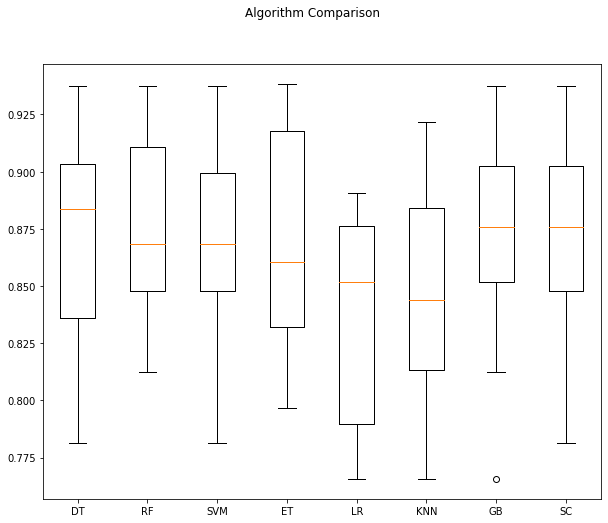

In [62]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [68]:
compare_models = [('Decision Tree', train_acc_DT, test_acc_DT, score_DT.mean(), precision_score_DT, recall_score_DT, f1_score_DT, ''),
          ('Random Forest', train_acc_RF, test_acc_RF, scores_RF.mean(), precision_score_RF, recall_score_RF, f1_score_RF, ''),
          ('Neural Network', train_acc_MLP, test_acc_MLP, scores_MLP.mean(), precision_score_MLP, recall_score_MLP, f1_score_MLP,''),
          ('SVC', train_acc_SVM, test_acc_SVM, scores_SVM.mean(), precision_score_SVM, recall_score_SVM, f1_score_SVM,''),
          ('Extra Tree', train_acc_ET, test_acc_ET, scores_ET.mean(), precision_score_ET, recall_score_ET, f1_score_ET,''),
          ('GradientBoosting', train_acc_GB, test_acc_GB, scores_GB.mean(), precision_score_GB, recall_score_GB, f1_score_GB,''),
          ('Logistic Regression', train_acc_LR, test_acc_LR, scores_LR.mean(), precision_score_LR, recall_score_LR, f1_score_LR,''),
          ('KNN', train_acc_KNN, test_acc_KNN, scores_KNN.mean(), precision_score_KNN, recall_score_KNN, f1_score_KNN,''),
          ('Stacking', train_acc_SC_tune_LR, test_acc_SC_tune_LR, scores_SC_tune_LR.mean(), precision_score_SC_tune_LR, recall_score_SC_tune_LR, f1_score_SC_tune_LR,'The Best Model'),
         ]

In [69]:
predict = pd.DataFrame(data = compare_models, columns=['Model', 'Train_accuracy', 'Test_accuracy', 'CV_score','precision_score', 'recall_score', 'f1_score', 'Description'])
predict.style.background_gradient(cmap='YlGn')

,Model,Train_accuracy,Test_accuracy,CV_score,precision_score,recall_score,f1_score,Description
0,Decision Tree,0.895639,0.82971,0.873846,0.858108,0.830065,0.843854,
1,Random Forest,0.926791,0.858696,0.864567,0.875,0.869281,0.872131,
2,Neural Network,0.884735,0.847826,0.864543,0.858065,0.869281,0.863636,
3,SVC,0.892523,0.847826,0.867668,0.845775,0.846804,0.846244,
4,Extra Tree,0.872274,0.84058,0.870793,0.838509,0.882353,0.859873,
5,GradientBoosting,0.897196,0.833333,0.87387,0.845161,0.856209,0.850649,
6,Logistic Regression,0.850467,0.811594,0.852043,0.843537,0.810458,0.826667,
7,KNN,0.875389,0.826087,0.852115,0.852349,0.830065,0.84106,
8,Stacking,0.897196,0.858696,0.869207,0.875,0.869281,0.872131,The Best Model


# The best model ==> Stacking
> The criterion for selecting the final model:
> Checking the difference between train and test accuracy (Checking the model in terms of overfitting) 

In [70]:
conf_matrix = confusion_matrix(y_test, y_test_pred_SC_tune_LR)

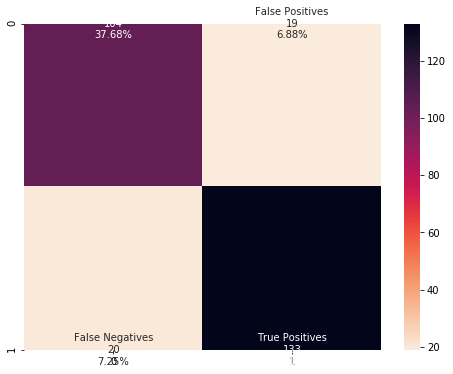

In [71]:
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt= '', cmap="rocket_r")

### **`confusion_matrix for cross_val_predict`**

In [72]:
y_pred_cross_val = cross_val_predict(SC_tune_LR, x_test_new, y_test, cv=10)
conf_matrix_cross_val = confusion_matrix(y_test, y_pred_cross_val)

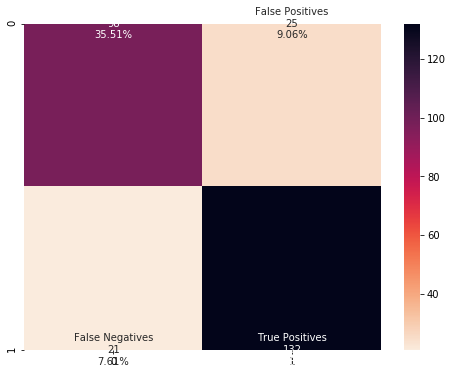

In [73]:
plt.figure(figsize=(8,6))
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_cross_val.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_cross_val.flatten()/np.sum(conf_matrix_cross_val)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_cross_val, annot=labels, fmt= '', cmap="rocket_r")

  # **`Thank You For Your Time.`**